# Assignment 4 - Beautiful graphics 

Your assignment is to create a single beautiful graphic using the data from Assignment 2. Specifically:


Create a beautiful graphic that includes: 

1. A minimum of 5 Tufte Rules
2. Uses custom colour pallete developed from a photo of your choice, related to the topic
3. Conforms to final publication rules for *Nature*, found here: http://s3-service-broker-live-19ea8b98-4d41-4cb4-be4c-d68f4963b7dd.s3.amazonaws.com/uploads/ckeditor/attachments/7822/3c_Final_artwork.pdf

**NB**: You will receive one bonus percentage on your final mark for each Tufte Rule used beyond your first five. This may require multiple panels within the same plot to acheive all 5 bonus points.

Also: the folders here https://github.com/halhen/viz-pub have some good example code (for you to steal!). There are many other sources, use Google and be creative.

---
# Marking
---
Pay close attention to the formatting requirements for *Nature*. As before, we will deduct 0.5pts for every formatting error so be sure you tick off each item.

---
# Submission
---
Submit your results by putting your final figure, the code used to generate it, the photograph used to create your colour pallete, and a short text summary outlining how you have used each of the Tufte Rules you're claiming in your results - that is four files - in a new secret Repo in GitHub. Send invitiaons to Aaron ([@mamacneil](https://gist.github.com/mamacneil)) and Taylor ([@tmgorham](https://github.com/tmgorham)) for that repo by **16 December at 23:59:59.**

In [179]:
library(ggplot2)

In [180]:
mlbdata = na.omit(read.csv("mlb2017_batting.txt"))
head(mlbdata)

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,⋯,SLG,OPS,OPS.,TB,GDP,HBP,SH,SF,IBB,Pos.Summary
2,2,Jose Abreu\abreujo02,30,CHW,AL,156,675,621,95,189,⋯,0.552,0.906,141,343,21,15,0,4,6,*3D
3,3,Cristhian Adames#\adamecr01,25,COL,NL,12,14,13,1,0,⋯,0.000,0.071,-80,0,0,0,0,0,0,/346
5,5,Lane Adams\adamsla01,27,ATL,NL,85,122,109,19,30,⋯,0.468,0.807,110,51,3,1,1,1,0,78/9
6,6,Matt Adams*\adamsma01,28,TOT,NL,131,367,339,46,93,⋯,0.522,0.841,117,177,5,1,0,4,5,37/D
7,7,Matt Adams*\adamsma01,28,STL,NL,31,53,48,4,14,⋯,0.396,0.735,94,19,0,0,0,1,0,/73D
8,8,Matt Adams*\adamsma01,28,ATL,NL,100,314,291,42,79,⋯,0.543,0.858,121,158,5,1,0,3,5,37


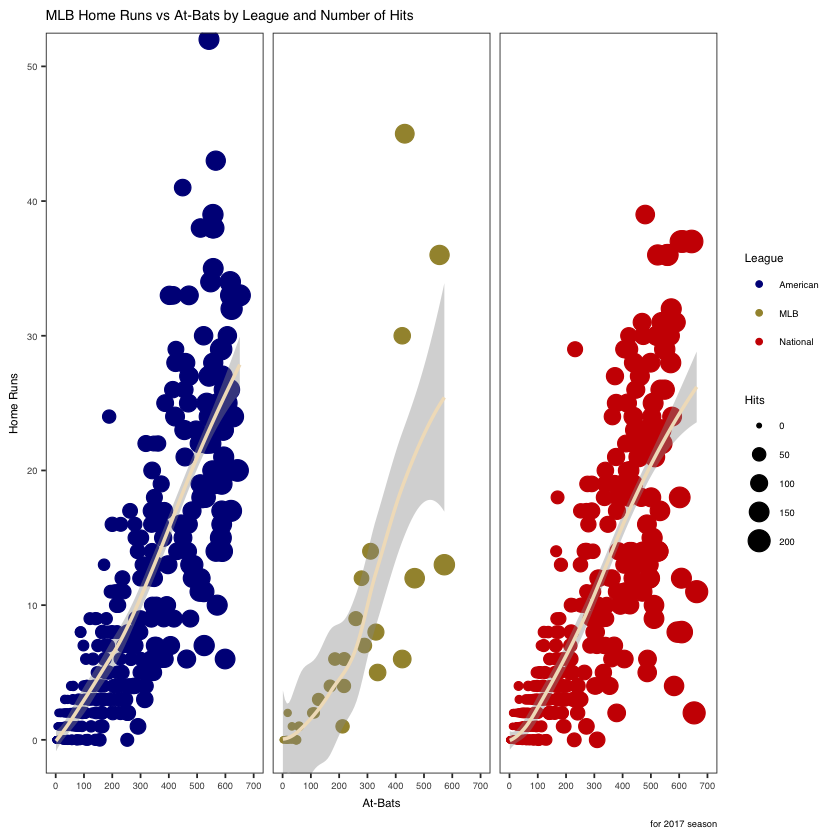

In [181]:
mlbdata = ggplot(data = mlbdata, aes(x = AB, y = HR)) +
        geom_point(aes(col = Lg, size = H)) +
        geom_smooth(method = loess, col = "#f1e0c4") +
        coord_cartesian(xlim = c(0, 700), ylim = c(0, 50)) +
        labs(title = "MLB Home Runs vs At-Bats by League and Number of Hits",
             x = "At-Bats", y = "Home Runs", caption = "for 2017 season") +
        scale_x_continuous(breaks = seq(0, 700, 100)) +
        theme_bw()
mlbdata = mlbdata + labs(color = "League", size = "Hits")
mlbdata =  mlbdata + scale_color_manual(name = "League",
                                             labels = c("American", "MLB", "National"), 
                                         values = c("#010088", "#a3933b", "#cd0001"))+facet_wrap( ~ Lg )+theme(text=element_text(size=7, family="Helvetica"))+theme(
  strip.background = element_blank(), strip.text = element_blank()) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank())
                                             
mlbdata = mlbdata + guides(color = guide_legend(order = 1),
                                size = guide_legend(order = 2))

mlbdata
ggsave(plot = mlbdata, width = 7.20472, height = 7.20472, dpi = 300, filename = "HR_VS_AB.pdf")